In [ ]:
import pandas as pd
import numpy as npy
import matplotlib.pyplot as plt
import seaborn as sns

hindi_df = pd.read_csv('df_train_hi.csv')
hindi_df.head()


,claim_span,text_tokens,index
0,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"['भाइयों' 'इसको' 'प्रशासन' 'कहे' ',' 'कि' 'कुश...",500
1,[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,['मौसम' 'विभाग' 'के' 'मुताबिक' 'अगले' '24' 'घं...,501
2,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,['योगी' 'सरकार' 'मे' '50' 'लाख' 'अधिक' 'बच्चे'...,502
3,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],['@U45195860' '@U84700880' 'तुमलोग' 'कितने' 'भ...,503
4,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,"['दिल्ली' 'का' 'एक' ""'"" 'नमूना' ""'"" 'उत्तर' 'प...",504


In [ ]:
data=hindi_df.copy()

In [ ]:
hindi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   claim_span   6098 non-null   object
 1   text_tokens  6098 non-null   object
 2   index        6098 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 143.0+ KB


In [ ]:
hindi_df['text_tokens'][0]

"['भाइयों' 'इसको' 'प्रशासन' 'कहे' ',' 'कि' 'कुशासन' 'कहें' 'कि' '...'\n 'दुशासन' 'कहें' ',' 'यह' 'निरंकुश' 'शासन' 'और' 'हिटलर' 'शाही' 'है' 'मध्य'\n 'प्रदेश' 'सरकार' 'की' '@U54973484' '@U93571983' '@U67822770' '@U18179557'\n '@U22676804' '@U14425216' '@U59069382' '#GiveMPTETjoiningOrAllowToDie'\n 'https://t.co/qgWSzBtqpU']"

In [ ]:
import re
def processText(text):
 text = text.lower()
 text = re.sub('((www.[^s]+)|(https?://[^s]+))','',text)
 text = re.sub('@[^s]+','',text)
 text = re.sub('[s]+', ' ', text)
 text = re.sub(r'#([^s]+)', r'1', text)
 text = re.sub(r'[.!:?"\/\-]', r'', text)
 text = text.strip(''" ")
 return text
for i in range(len(hindi_df)):
  hindi_df['text_tokens'][i] = processText(hindi_df['text_tokens'][i])

Streaming output truncated to the last 5000 lines.
<ipython-input-74-d9831d444ecf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = processText(hindi_df['text_tokens'][i])
<ipython-input-74-d9831d444ecf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = processText(hindi_df['text_tokens'][i])
<ipython-input-74-d9831d444ecf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hind

In [ ]:
import re

def remove_urls(text):
    url_pattern = re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
    return url_pattern.sub(r'', text)

hindi_df['text_tokens'] = hindi_df['text_tokens'].apply(remove_urls)
hindi_df['text_tokens'][0]

"['भाइयों' 'इसको' 'प्रशासन' 'कहे' ',' 'कि' 'कुशासन' 'कहें' 'कि' ''\n 'दुशासन' 'कहें' ',' 'यह' 'निरंकुश' 'शासन' 'और' 'हिटलर' 'शाही' 'है' 'मध्य'\n 'प्रदेश' 'सरकार' 'की' ' zbtqpu']"

In [ ]:
hindi_df['text_tokens'].tail(10)

6088    ['जहां' 'ना' 'पहुंचे' 'राशन' ',' 'वहां' 'पहुंच...
6089    ['प्रशांत' 'भूषण' 'पर' 'उनके' 'केबिन' 'में' 'ह...
6090    ['अमित' 'शाह' '9' 'जून' 'को' 'बिहार' 'में' 'रै...
6091    ['भाई' 'जाके' 'हिन्दू' 'भाइयों' 'की' 'मदद' 'कर...
6092    ['भाउ' 'श्री' 'के' 'ब्लेक' 'टिकिट' 'बेचकर' 'खु...
6093    ['vodafone' 'idea' 'ने' 'पेश' 'किया' '46' 'रुप...
6094    ['यह' 'इटली' 'का' 'फोटो' 'है' ',' 'जहां' 'कोरो...
6095    ['जब' 'अपनें' 'ही' 'शामिल' 'होते' 'है' 'दुश्मन...
6096    ['6' 'साल' 'जिसे' 'कोसने' 'के' 'बाद' ',' 'खूब'...
6097    ['गरीबी' 'पर' 'वार' 'होगा' ',' 'सपना' 'ये' 'सा...
Name: text_tokens, dtype: object

In [ ]:
def count_length():
  hindi_df['word_count'] = hindi_df['text_tokens'].apply(lambda x: len(str(x).split(" ")))

count_length()
hindi_df.tail(10)

,claim_span,text_tokens,index,word_count
6088,[1 1 1 1 1 1 1 1 1 0 0],"['जहां' 'ना' 'पहुंचे' 'राशन' ',' 'वहां' 'पहुंच...",6588,11
6089,[1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1],['प्रशांत' 'भूषण' 'पर' 'उनके' 'केबिन' 'में' 'ह...,6589,21
6090,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1],['अमित' 'शाह' '9' 'जून' 'को' 'बिहार' 'में' 'रै...,6590,17
6091,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,['भाई' 'जाके' 'हिन्दू' 'भाइयों' 'की' 'मदद' 'कर...,6591,25
6092,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,['भाउ' 'श्री' 'के' 'ब्लेक' 'टिकिट' 'बेचकर' 'खु...,6592,33
6093,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0],['vodafone' 'idea' 'ने' 'पेश' 'किया' '46' 'रुप...,6593,22
6094,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1],"['यह' 'इटली' 'का' 'फोटो' 'है' ',' 'जहां' 'कोरो...",6594,19
6095,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,['जब' 'अपनें' 'ही' 'शामिल' 'होते' 'है' 'दुश्मन...,6595,23
6096,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"['6' 'साल' 'जिसे' 'कोसने' 'के' 'बाद' ',' 'खूब'...",6596,32
6097,[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0...,"['गरीबी' 'पर' 'वार' 'होगा' ',' 'सपना' 'ये' 'सा...",6597,62


In [ ]:
import re
emoji_pattern = re.compile("[" u"U0001F600-U0001F64F"  u"U0001F300-U0001F5FF"   u"U0001F680-U0001F6FF"   u"U0001F1E0-U0001F1FF"
u"U00002500-U00002BEF"  u"U00002702-U000027B0" u"U00002702-U000027B0" u"U000024C2-U0001F251"
u"U0001f926-U0001f937" u"U00010000-U0010ffff" u"u2640-u2642" u"u2600-u2B55" u"u200d" u"u23cf" u"u23e9"
u"u231a" u"ufe0f"  u"u3030" "]+", flags=re.UNICODE)


In [ ]:
for i in range(len(hindi_df)):
  hindi_df['text_tokens'][i] = emoji_pattern.sub(r'', hindi_df['text_tokens'][i])


Streaming output truncated to the last 5000 lines.
<ipython-input-79-fae0f55b8d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = emoji_pattern.sub(r'', hindi_df['text_tokens'][i])
<ipython-input-79-fae0f55b8d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = emoji_pattern.sub(r'', hindi_df['text_tokens'][i])
<ipython-input-79-fae0f55b8d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [ ]:
!pip install indic-nlp-library

In [ ]:
!pip install urlextract

In [ ]:
import urlextract

def find_urls_with_urlextract(text):
  extractor = urlextract.URLExtract()
  return extractor.find_urls(text)

text = "Check out this website https://www.example.com or this one http://shorturl.at"
urls = hindi_df['text_tokens'].apply(find_urls_with_urlextract)
print(urls)

0       []
1       []
2       []
3       []
4       []
        ..
6093    []
6094    []
6095    []
6096    []
6097    []
Name: text_tokens, Length: 6098, dtype: object


In [ ]:
from indicnlp.tokenize import indic_tokenize
def tokenization(indic_string):
  tokens = []
  for t in indic_tokenize.trivial_tokenize(indic_string):
    tokens.append(t)
  return tokens
hindi_df['text_tokens'] =hindi_df['text_tokens'].apply(lambda x: tokenization(x))
hindi_df['text_tokens'][1:10]

1    [', मौसम, ', ', विभाग, ', ', के, ', ', मुताबिक...
2    [', योगी, ', ', सरकार, ', ', मे, ', ', ', ', ल...
3                                                  [']
4    [', दिल्ली, ', ', का, ', ', एक, ', ', ', नमूना...
5    [', ताहिर, ', ', हुसैन, ', ', के, ', ', बच्चे,...
6                                                  [']
7    [', ‘, ', ', मोदी, ', ', ने, ', ', अर्थव्यवस्थ...
8                                                  [']
9    [', कोरोना, ', ', महामारी, ', ', लोगों, ', ', ...
Name: text_tokens, dtype: object

In [ ]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what',
                'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


In [ ]:
punctuations = ['\n', '।', '/', '`', '+', '\\', '"', '?', '(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '#', '*', ';', '-', '}']


In [ ]:
to_be_removed=stopwords_hi+stopwords_en+punctuations
hindi_df['text_tokens'] = hindi_df['text_tokens'].apply(lambda x: [item for item in x if item not in to_be_removed])
hindi_df['text_tokens'][0]

['भाइयों',
 'इसको',
 'प्रशासन',
 'कहे',
 'कुशासन',
 'कहें',
 'दुशासन',
 'कहें',
 'निरंकुश',
 'शासन',
 'हिटलर',
 'शाही',
 'मध्य',
 'प्रदेश',
 'सरकार',
 'z']

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import collections
corpus_list =[]
for i in range(len(hindi_df)):
  corpus_list +=hindi_df['text_tokens'][i]
  counter=collections.Counter(corpus_list)
print(counter)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Counter({'भारत': 525, 'देश': 439, 'क्या': 378, 'सरकार': 371, 'अब': 366, 'कोरोना': 343, 'मोदी': 307, 'दिल्ली': 246, 'लोगों': 241, 'चीन': 240, 'v': 224, '😂': 223, 'गई': 215, 'पुलिस': 207, 'नही': 201, 'दी': 185, 'होगा': 185, 'साल': 182, 'दिन': 181, 'प्रदेश': 180, 'गए': 178, 'लोग': 171, 'बात': 165, 'भारतीय': 164, 'कांग्रेस': 161, 'वीडियो': 157, 'वो': 156, 'सिंह': 152, 'सुशांत': 152, 'नाम': 145, 'राष्ट्रपति': 134, 'सेना': 133, 'लेकर': 132, 'बार': 129, 'पूर्व': 129, 'मंत्री': 124, 'पाकिस्तान': 123, 'क्यों': 119, 'चाहिए': 118, 'अगर': 117, 'दे': 116, 'हमारे': 116, 'शुरू': 114, 'बिहार': 113, 'मुंबई': 113, 'राम': 111, 'प्रधानमंत्री': 110, 'कंगना': 108, 'प्रणब': 108, 'हर': 107, 'लिया': 107, 'देने': 106, 'कश्मीर': 104, 'जांच': 104, 'गांधी': 103, 'खान': 102, 'मुखर्जी': 102, 'लाख': 101, 'w': 101, 'रिया': 101, 'बीजेपी': 101, 'जय': 99, 'वाली': 98, 'महिला': 96, 'जारी': 96, 'आ': 95, 'होगी': 95, 'शिक्षा': 95, 'मामले': 95, 'काम': 94, 'पार्टी': 93, 'बीच': 93, 'ज्यादा': 91, 'केस': 91, 'कोविड': 90, 'समय': 88

In [ ]:

least_common= [word for word, word_count in counter.most_common()[:-50:-1]]
print(least_common)

['फोटोशॉप्ड', 'इशतहार', 'कोसने', 'जाल', 'अपनें', 'wvyz', 'वैलिडिटी', 'लुटियन', 'सांढ़', 'कमाए', 'टिकिट', 'ब्लेक', 'भाउ', 'जाके', 'एक्टिविस्ट', 'केबिन', 'उतारता', 'ग्लब्स', 'निकालता', 'मचता', 'फैक्ट्रियों', 'इलेक्ट्रॉनिक्स', 'गारमेंट', 'फैक्ट्रियां', 'फ्रीडमैन', 'थाॅमस', 'भ्रस्टाचार', 'आघोषित', 'परिकल्पना', 'बाज', 'शिकस्त', 'जबरदस्त', 'मोरया', 'बाप्पा', 'गणपती', 'ब्रावो', 'थेरेपी', 'फ्लो', 'असामान्य', 'फोटोग्राफरों', 'सुरगा', 'लिस्टर्स', 'मनुवाद', 'पितृसत्ता', 'कोड', 'सेक्रेटरी', 'उलेमा', 'जमीयत', 'प्रचंड']


In [ ]:
for i in range(len(hindi_df)):
  hindi_df['text_tokens'][i] = [word for word in hindi_df['text_tokens'][i] if word not in least_common]

Streaming output truncated to the last 5000 lines.
<ipython-input-89-62d2f40ceb0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = [word for word in hindi_df['text_tokens'][i] if word not in least_common]
<ipython-input-89-62d2f40ceb0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hindi_df['text_tokens'][i] = [word for word in hindi_df['text_tokens'][i] if word not in least_common]
<ipython-input-89-62d2f40ceb0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
hindi_df

,claim_span,text_tokens,index,word_count
0,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[भाइयों, इसको, प्रशासन, कहे, कुशासन, कहें, दुश...",500,26
1,[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,"[मौसम, विभाग, मुताबिक, अगले, घंटे, पश्चिम, बंग...",501,36
2,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,"[योगी, सरकार, लाख, अधिक, बच्चे, स्कूल, पहुंचे,...",502,40
3,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],[],503,1
4,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,"[दिल्ली, नमूना, उत्तर, प्रदेश, आता, कहता, कोवि...",504,62
...,...,...,...,...
6093,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0],"[v, पेश, रुपये, नया, प्लान, दिन, मिलेंगे, फायदे]",6593,22
6094,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1],"[इटली, फोटो, कोरोनावायरस, चलते, ज्यादा, डॉक्टर...",6594,19
6095,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[शामिल, दुश्मनों, चाल, शेर, फस, जाता, कुत्तों]",6595,23
6096,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[साल, खूब, बुरा, भला, बोलने, उन्ही, नमन, पड़े,...",6596,32


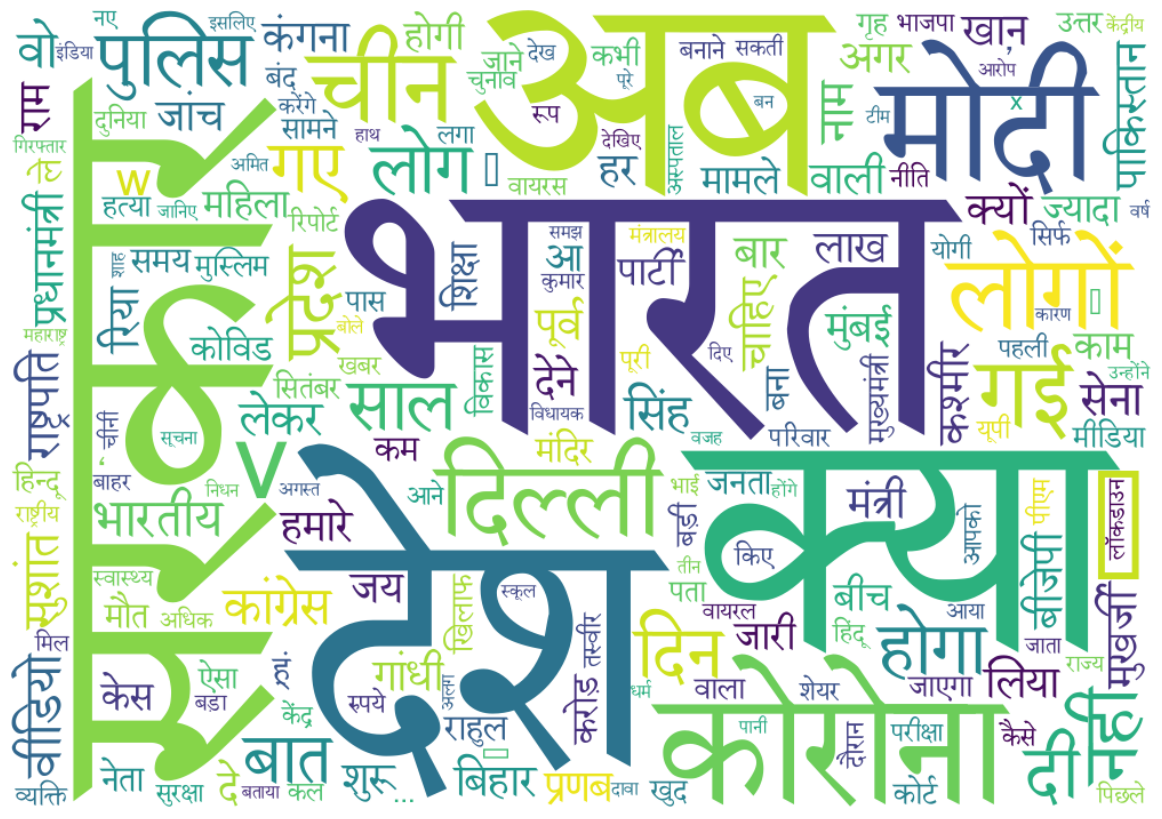

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_list = []
font='Akshar Unicode.ttf'
for i in range(len(hindi_df)):
    df_list +=hindi_df['text_tokens'][i]
dictionary=collections.Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10,font_path=font).generate_from_frequencies(dictionary)
# plot the WordCloud image
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
hindi_df

,claim_span,text_tokens,index,word_count
0,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[भाइयों, इसको, प्रशासन, कहे, कुशासन, कहें, दुश...",500,26
1,[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,"[मौसम, विभाग, मुताबिक, अगले, घंटे, पश्चिम, बंग...",501,36
2,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,"[योगी, सरकार, लाख, अधिक, बच्चे, स्कूल, पहुंचे,...",502,40
3,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],[],503,1
4,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,"[दिल्ली, नमूना, उत्तर, प्रदेश, आता, कहता, कोवि...",504,62
...,...,...,...,...
6093,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0],"[v, पेश, रुपये, नया, प्लान, दिन, मिलेंगे, फायदे]",6593,22
6094,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1],"[इटली, फोटो, कोरोनावायरस, चलते, ज्यादा, डॉक्टर...",6594,19
6095,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[शामिल, दुश्मनों, चाल, शेर, फस, जाता, कुत्तों]",6595,23
6096,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[साल, खूब, बुरा, भला, बोलने, उन्ही, नमन, पड़े,...",6596,32


In [ ]:
hindi_df[hindi_df['word_count']<5]['text_tokens']

3                          []
6                          []
8                          []
11                         []
14                         []
                ...          
6054                       []
6059                       []
6078                       []
6079    [केंद्रीय, मंत्री, w]
6085                       []
Name: text_tokens, Length: 1433, dtype: object

In [ ]:
import pip

def get_library_info(library_name):
  try:
    package_info = pip.get_installed_distributions(local_only=True, dist='.' + library_name)
    if package_info:
      return package_info[0]
    else:
      return None
  except Exception as e:
    print(f"Error: {e}")

# Example usage
library_info = get_library_info('indicnlp')
if library_info:
  print(library_info.version)
  print(library_info.location)


Error: module 'pip' has no attribute 'get_installed_distributions'


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
from indicnlp.normalize import indic_normalize
from indicnlp.tokenize import indic_tokenize
text = "नमस्ते, कैसे हो आप?"

factory = indic_normalize.IndicNormalizerFactory()
normalizer = factory.get_normalizer("hi")  # "hi" for Hindi
normalized_text = normalizer.normalize(text)

tokens = indic_tokenize.trivial_tokenize(normalized_text)

print(tokens)

['नमस्ते', ',', 'कैसे', 'हो', 'आप', '?']


In [ ]:
print(normalized_text)

नमस्ते, कैसे हो आप?
